# Loyiha maqsadi:

#Bank mijozlarining kreditni qaytara olish ehtimolini aniqlovchi Machine Learning model yaratish



---


### Dataset haqida ma'lumot:
* `Customer ID` : har bir mijoz uchun noyob identifikator
* `Surname`: mijozning familiyasi
* `Credit score`: mijozning kredit qobiliyatini ko‘rsatuvchi raqamli qiymat
* `Geography`: mijoz istiqomat qiladigan mamlakat (Fransiya, Ispaniya yoki Germaniya)
* `Gender`: mijozning jinsi (Male yoki Female)
* `Age`: mijozning yoshi
* `Tenure`: mijozning bank bilan ishlagan yillari soni
* `Balance`: mijozning hisobidagi pul miqdori
* `NumOfProducts`: mijoz foydalanayotgan bank mahsulotlari soni (masalan, jamg‘arma hisobi, kredit kartasi)
* `HasCrCard`: mijozda kredit kartasi bor-yo‘qligi (1 = bor, 0 = yo‘q)
* `IsActiveMember`: mijozning faol a’zo ekani (1 = ha, 0 = yo‘q)
* `EstimatedSalary`: mijozning taxminiy yillik daromadi.
---


## 1.1 Foydalanilgan kutubxonalar





In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, roc_curve,  auc, roc_auc_score

## 1.2 Ma'lumotlarni yuklash

In [4]:

path_1 = 'https://raw.githubusercontent.com/Jakhongir19982009/Bank_Credit_churn_predict/refs/heads/main/train.csv'
path_2 = 'https://raw.githubusercontent.com/Jakhongir19982009/Bank_Credit_churn_predict/refs/heads/main/test.csv'

train_df = pd.read_csv(path_1)
test_df = pd.read_csv(path_2)

display(train_df.head())
print("Train_dataset hajmi:", train_df.shape)
print("Test_dataset hajmi:", test_df.shape)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15702656.0,Nwora,567.0,France,Male,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0
1,1,15647965.0,Yevdokimova,628.0,France,Female,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0
2,2,15798834.0,Ch'iu,635.0,France,Female,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0
3,3,15672056.0,Hsia,681.0,France,Male,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0
4,4,15759537.0,Okwudilichukwu,587.0,France,Female,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0


Train_dataset hajmi: (15000, 14)
Test_dataset hajmi: (10000, 13)


## 2.1 Ma'lumotlarni tahlil qilish

In [5]:
# ustunlar umumiy tiplarini ko'rish
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


### 2.2 NaN qiymatlar mavjudligini tekshirish

In [6]:
train_df.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### 2.3 Raqamli ustunlar umumiy tahlili

In [7]:
train_df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,1.579454e+07,657.856800,37.710133,5.018667,42338.107539,1.590533,0.779133,0.496000,116944.059867,0.198467
std,4330.271354,1.268495e+07,72.678739,8.144880,2.787407,59703.047751,0.525822,0.414845,0.500001,46047.485455,0.398859
min,0.000000,1.567151e+05,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,1.563435e+07,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82644.332500,0.000000
50%,7499.500000,1.568947e+07,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122449.420000,0.000000
75%,11249.250000,1.575682e+07,707.000000,42.000000,7.000000,109636.342500,2.000000,1.000000,1.000000,155703.022500,0.000000
max,14999.000000,1.569172e+09,850.000000,72.000000,10.000000,187911.550000,5.000000,1.000000,1.000000,885120.790000,1.000000


### 2.4 Raqamli ustunlar umumiy bog'liqligi

In [8]:
train_df.corrwith(train_df['Exited'], numeric_only=True).abs().sort_values(ascending=False)

,0
Exited,1.000000
Age,0.449425
NumOfProducts,0.312812
IsActiveMember,0.188748
Balance,0.160062
CreditScore,0.052375
EstimatedSalary,0.035193
Tenure,0.032897
id,0.015533
HasCrCard,0.010670


`id, creditscore, estimatedsalary, tenure, hascrcard, customerid` - ustunlarini tashlab yuborish mumkin

## 3.1 Ma'lumotlarni vizual tahlil qilish

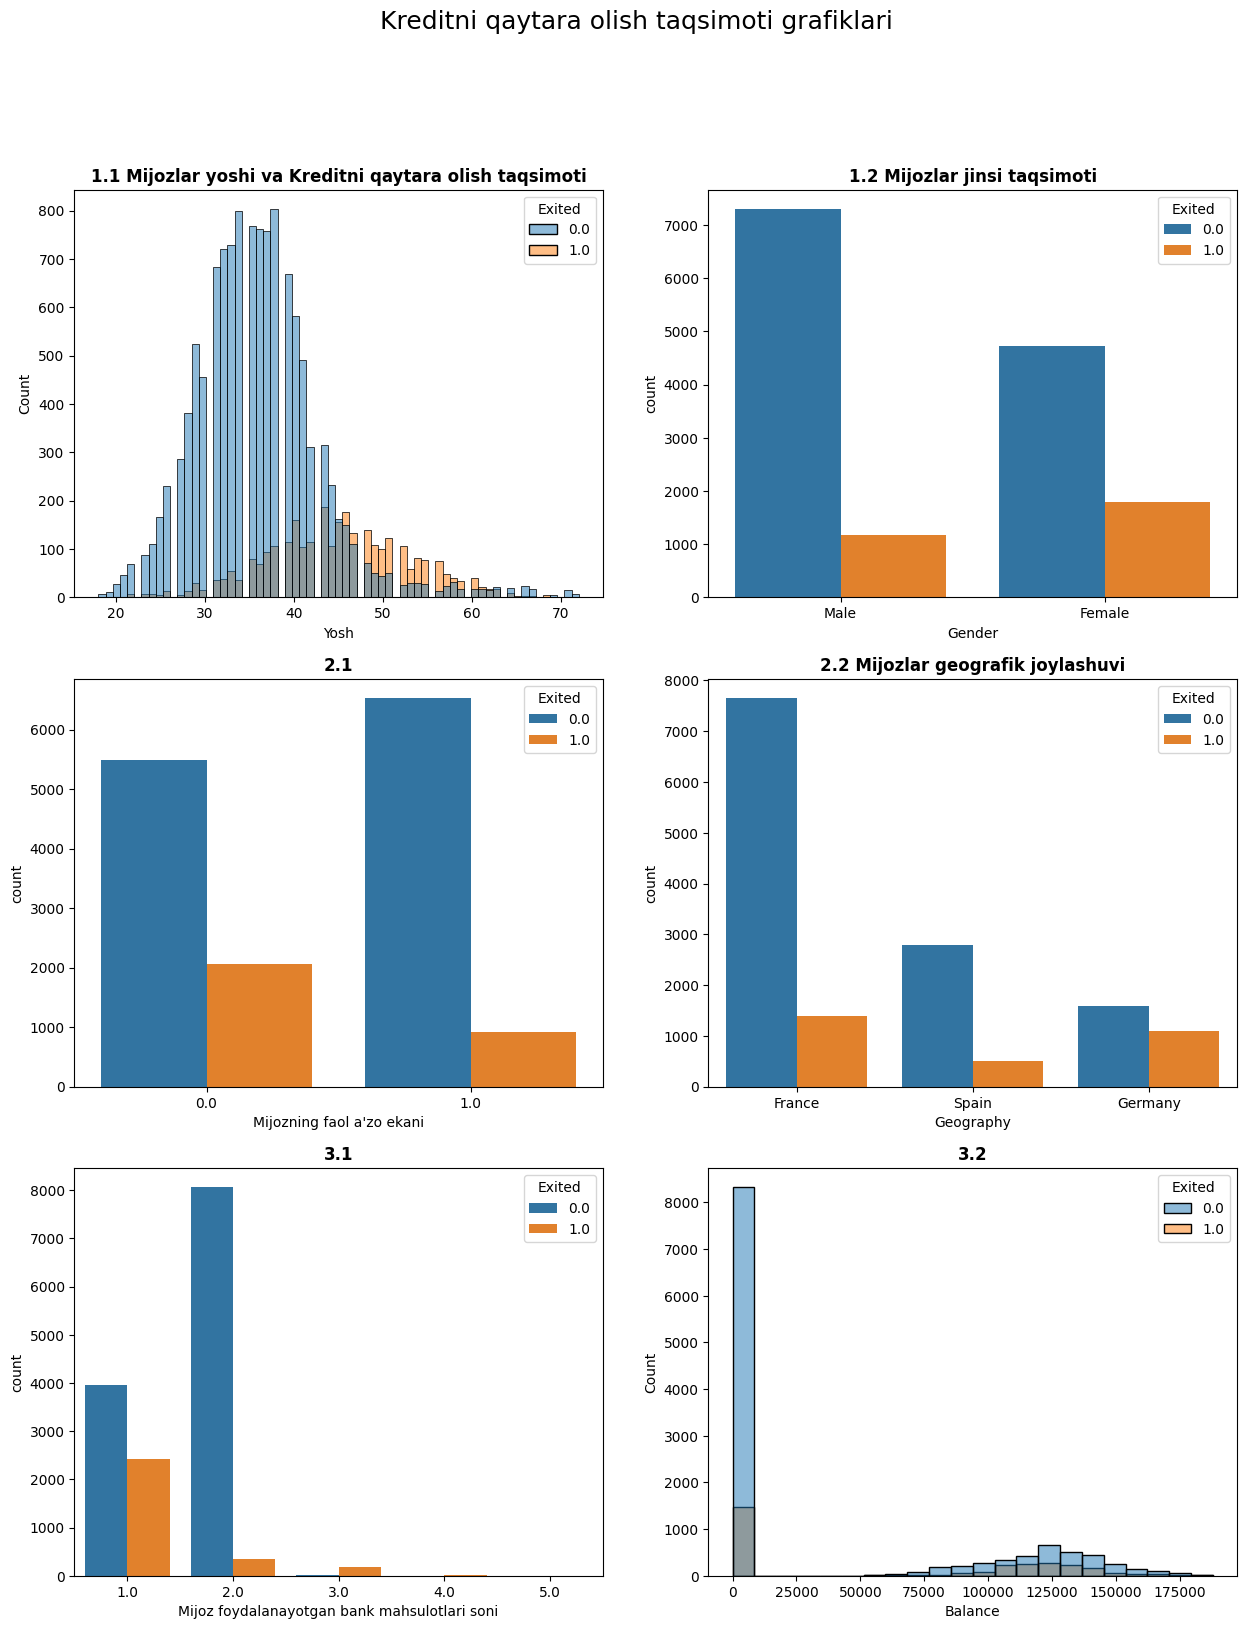

In [9]:
fig, ax = plt.subplots(3,2, figsize=(15,18))

sns.histplot(ax=ax[0,0], data=train_df, x='Age', hue='Exited')
sns.countplot(ax=ax[0,1], data=train_df, x='Gender', hue='Exited')
sns.countplot(ax=ax[1,0], data=train_df, x='IsActiveMember', hue='Exited')
sns.countplot(ax=ax[1,1], data=train_df, x='Geography', hue='Exited')
sns.countplot(ax=ax[2,0], data=train_df, x='NumOfProducts', hue='Exited')
sns.histplot(ax=ax[2,1], data=train_df, x='Balance', hue='Exited')

fig.suptitle('Kreditni qaytara olish taqsimoti grafiklari', fontsize=18)
ax[0,0].set_title('1.1 Mijozlar yoshi va Kreditni qaytara olish taqsimoti', fontweight='semibold')
ax[0,0].set_xlabel('Yosh')

ax[0,1].set_title('1.2 Mijozlar jinsi taqsimoti', fontweight='semibold')

ax[1,0].set_title('2.1', fontweight='semibold')
ax[1,0].set_xlabel('Mijozning faol a\'zo ekani')
ax[1,1].set_title('2.2 Mijozlar geografik joylashuvi', fontweight='semibold')
ax[2,0].set_xlabel('Mijoz foydalanayotgan bank mahsulotlari soni')
ax[2,0].set_title('3.1', fontweight='semibold')
ax[2,1].set_title('3.2', fontweight='semibold')
plt.show()

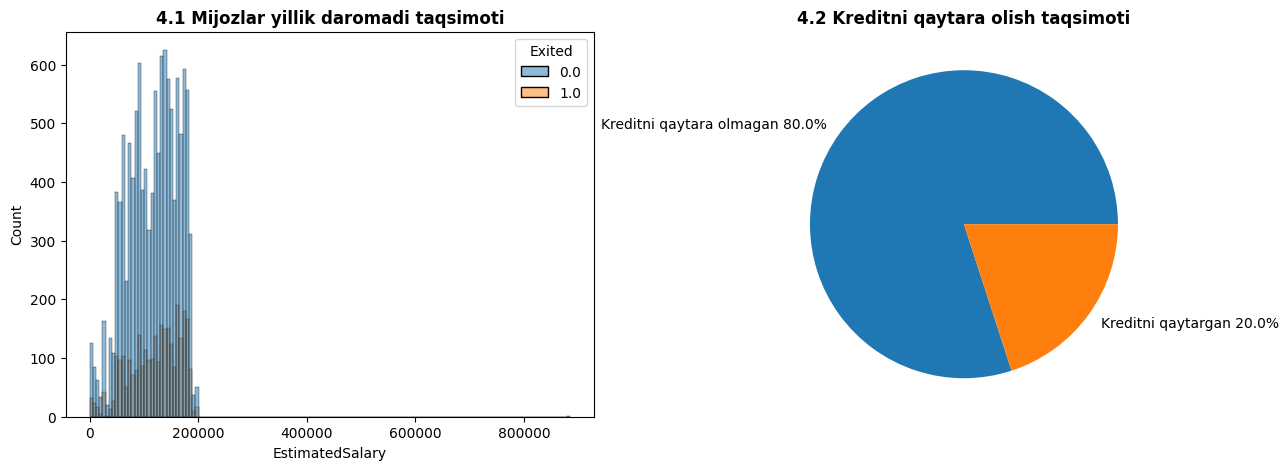

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
exited_rate = np.round(train_df['Exited'].value_counts()/len(train_df)*100)
rate_false, rate_true = exited_rate[0], exited_rate[1]

labels = [f'Kreditni qaytara olmagan {rate_false}%', f'Kreditni qaytargan {rate_true}%']

plt.pie(exited_rate, labels=labels)
plt.title('4.2 Kreditni qaytara olish taqsimoti', fontweight='semibold')
sns.histplot(ax=ax[0], data=train_df, x='EstimatedSalary', hue='Exited')
ax[0].set_title('4.1 Mijozlar yillik daromadi taqsimoti', fontweight='semibold')
plt.show()

### 3.2 Vizual tahlil xulosalari:

##### KQO - KREDITNI QAYTARA OLISH
*   1.1 KQO ehtimoli yuqori mijozlar yoshi 30-60 oraliqda ekan
*   1.2 Erkak mijozlar ko'plikni tashkil qilar, KQO ehtimoli ko'proq mijozlarni ayollar tashkil qilar ekan
*   2.1 Faol mijozlar ko'proq lekin, passiv mijozlar ichida KQO ehtimoli ko'proq
*   2.2 Geografik joylashuv bo'yicha Fransiyadagi mijozlar anchagina ko'p ekan
*   3.2 Juda ko'p mijozlar hisob raqami `0` ga teng ekan
*   4.1 Mijozlar yillik daromadi ustunida noodatiy katta qiymatlar mavjud ekan
*   4.2 KQO ehtimoli bor va yo'q mijozlar farqi anchagina katta 80|20 % ekan



## 4.1 Ma'lumotlarga ishlov beruvchi funksiya va obyektlar yaratish

In [11]:
# ustunlar nomlarini ishlashga qulay holga keltirib olamiz
column_names = train_df.columns
train_df.columns = column_names.str.lower()

def preprocess_data(df, test_set=False):
  """"Berilgan dataframeni modelga uzatishga tayyor qilib qaytaruvchi funksiya"""

  # kategoriyali geography ustunini raqamlashtirish
  encoded_df = pd.get_dummies(df, columns=['geography'])
  encoded_df.replace({False:0, True:1}, inplace=True)

  # kategoriyali gender ustunini raqamlashtirish
  encoded_df['gender'] = encoded_df['gender'].replace({'Female':0, 'Male':1})

  # natijaga ta'siri kam bo'lgan ustunlarni tashlab yuborish
  drop_columns = ['id', 'surname', 'customerid', 'creditscore', 'estimatedsalary', 'tenure', 'hascrcard', 'geography_Spain']
  encoded_df = encoded_df.drop(drop_columns, axis=1)

  return encoded_df

# ma'lumotlarni normalizatsiya qiluvchi obyekt yaratish va o'rtacha qiymatlarni hisoblash
scaler = MinMaxScaler()
cols_to_scale = ['age', 'balance', 'numofproducts']
scaler.fit(train_df[cols_to_scale])

MinMaxScaler()

## 4.2 Ma'lumotlarga ishlov berish

In [12]:
# `preprocess_data` funksiyasini qollash va normalizatsiya qilish
encoded_df = preprocess_data(train_df)
encoded_df[cols_to_scale] = scaler.transform(encoded_df[cols_to_scale])

/tmp/ipython-input-3758805012.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df.replace({False:0, True:1}, inplace=True)
/tmp/ipython-input-3758805012.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df['gender'] = encoded_df['gender'].replace({'Female':0, 'Male':1})


## 5.1 Barcha raqamlashgan qiymatlarni natija bilan korrelyatsiyasi(bog'liqligini) ko'rish

In [13]:
encoded_df.corrwith(encoded_df['exited']).abs().sort_values(ascending=False)

,0
exited,1.000000
age,0.449425
numofproducts,0.312812
geography_Germany,0.242651
isactivemember,0.188748
gender,0.169465
balance,0.160062
geography_France,0.137703


### 5.2 Korrelyatsiya tahlili xulosasi:

*   Age: mijozning yoshi
*   NumOfProducts: mijoz foydalanayotgan bank mahsulotlari soni
*   Geography: Asosan Genmany va France
*   IsActiveMember: mijozning faol a'zo ekani
*   Gender: mijoz jinsi
*   Balance: mijoz hisobidagi mablag' miqdori


## 6.1 Ma'lumotlarni train va test qismlarga bo'lib, Machine Learning model yaratamiz


#### *Tasniflovchi XGBClassifier model algoritmidan foydalanildi*

In [14]:
# train va test qismlarga bo'lish
X = encoded_df.drop('exited', axis=1)
y = encoded_df['exited'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [15]:
# model parametri uchun eng yaxshi n qiymatni topish
param_grid = {'n_estimators':np.arange(1,50)}
xgb_model_demo = XGBClassifier()

xgb_gscv = GridSearchCV(xgb_model_demo, param_grid, cv=5, scoring='accuracy')
xgb_gscv.fit(X_train, y_train)
best_n = xgb_gscv.best_params_['n_estimators']
print(f'Eng yaxshi n_estimators qiymat: {best_n}')

Eng yaxshi n_estimators qiymat: 12


In [16]:
# model yaratish va o'qitish
balance = len(y_train[y_train==0])/len(y_train[y_train==1])
xgb_model = XGBClassifier(n_estimators=best_n, scale_pos_weight=balance, objective='binary:logistic', random_state=41)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None,
              n_estimators=np.int64(12), n_jobs=None, num_parallel_tree=None, ...)

### 1.2 Modelni baholash

AUC-ROC:  0.9291


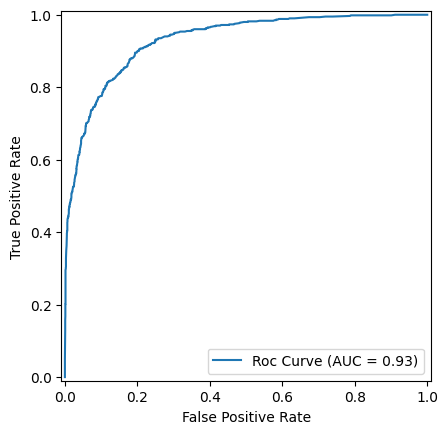

In [17]:
# natija va ehtimolliklarni olish
pred = xgb_model.predict(X_test)
pred_proba = xgb_model.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, pred_proba).round(4)

# AUC ROC metrikada hisoblash
print("AUC-ROC: ", auc_score)

# AUC-ROC
fpr, tpr, threshold = roc_curve(y_test, pred_proba)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Roc Curve')
display.plot()
plt.show()


In [18]:
xgb_model.predict_proba(X_test)

array([[0.9724118 , 0.02758821],
       [0.9237321 , 0.07626791],
       [0.9694116 , 0.03058837],
       ...,
       [0.9487573 , 0.05124274],
       [0.950915  , 0.04908501],
       [0.9269618 , 0.07303823]], dtype=float32)

In [19]:
print(f"Natija klasslari tartibi: {xgb_model.classes_}")

Natija klasslari tartibi: [0 1]


### 7. Modelni test ma'lumotlarda qollash

In [20]:
# ustun nomlarini bir xil holatga keltirib olish
col_names = test_df.columns
test_df.columns = col_names.str.lower()

# ma'lumotlarga ishlov  berish va normalizatsiya qilish
encoded_test_df = preprocess_data(test_df)
encoded_test_df[cols_to_scale] = scaler.transform(encoded_test_df[cols_to_scale])

# ma'lumotlarni modelga uzatish va natijalarni df ga aylantirib olish
results = xgb_model.predict_proba(encoded_test_df)[:,1].round(1)
results = pd.DataFrame({'Exited':results})

idx = test_df['id']
result_df = pd.concat([idx, results], axis=1)

/tmp/ipython-input-3758805012.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df.replace({False:0, True:1}, inplace=True)
/tmp/ipython-input-3758805012.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_df['gender'] = encoded_df['gender'].replace({'Female':0, 'Male':1})


### Natijalar o'nli songa yaxlitlangan

In [21]:
result_df

,id,Exited
0,15000,0.4
1,15001,0.4
2,15002,0.1
3,15003,0.4
4,15004,0.0
...,...,...
9995,24995,0.2
9996,24996,0.2
9997,24997,1.0
9998,24998,0.0
